In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [7]:
import pandas as pd
import warnings
import time

warnings.filterwarnings("ignore")

In [8]:
house_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [9]:
house_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [10]:
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
house_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
#Convert categorical variables to numeric using one-hot encoding
house_df_encoded = pd.get_dummies(house_df, drop_first=True)


In [13]:
house_df_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,False,True,False,False,False,True,False


In [14]:
# Finding the strong correlation with my target value and the other feature

corr_matrix = house_df_encoded.corr()

# Specify 'SalePrice' as the target variable
target_corr = corr_matrix["SalePrice"].abs().sort_values(ascending=False)

# Set a threshold to select features with strong correlation (e.g., > 0.5)
selected_features = target_corr[target_corr > 0.5].index.tolist()

# Remove 'SalePrice' itself from the selected features
selected_features.remove("SalePrice")

# Create the DataFrame with selected features
X = house_df_encoded[selected_features]
y = house_df_encoded["SalePrice"]


In [15]:
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual_TA,FullBath,TotRmsAbvGrd,YearBuilt,KitchenQual_TA,YearRemodAdd
0,7,1710,2,548,856,856,False,2,8,2003,False,2003
1,6,1262,2,460,1262,1262,True,2,6,1976,True,1976
2,7,1786,2,608,920,920,False,2,6,2001,False,2002
3,7,1717,3,642,756,961,True,1,7,1915,False,1970
4,8,2198,3,836,1145,1145,False,2,9,2000,False,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,True,2,7,1999,True,2000
1456,6,2073,2,500,1542,2073,True,2,7,1978,True,1988
1457,7,2340,1,252,1152,1188,False,2,9,1941,False,2006
1458,5,1078,1,240,1078,1078,True,1,5,1950,False,1996


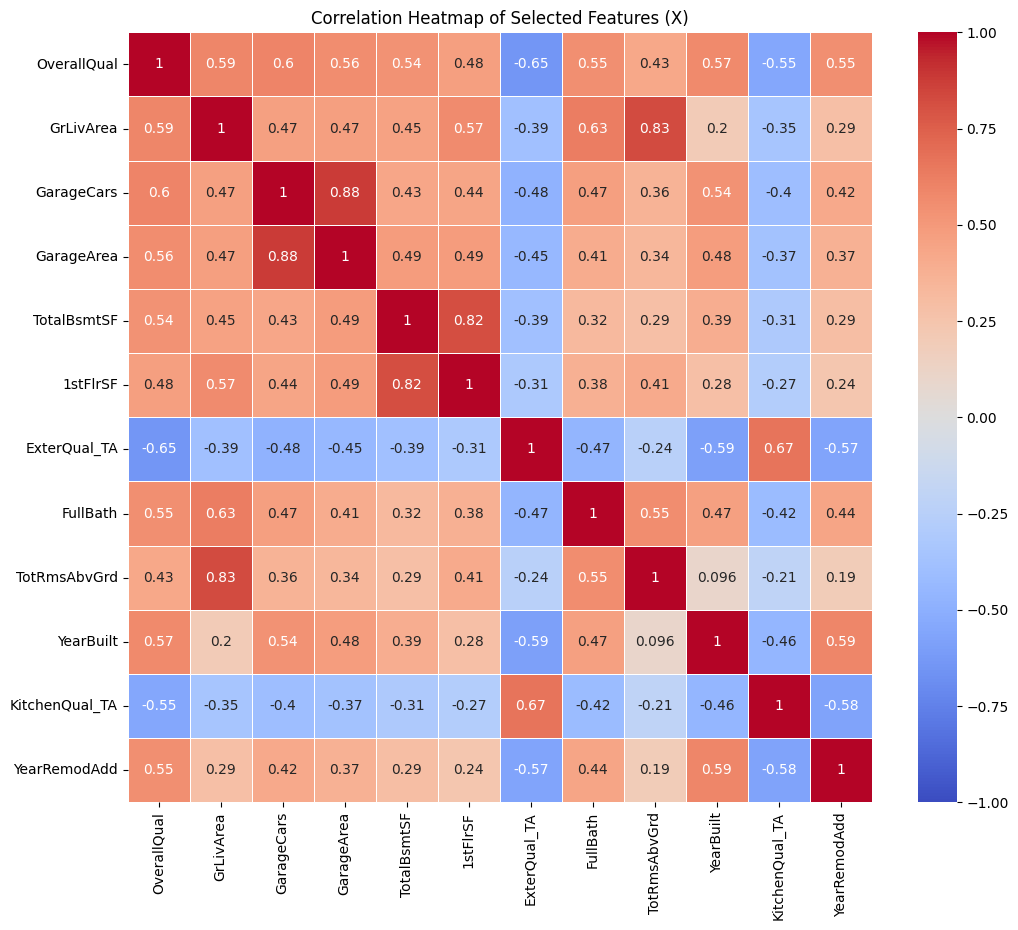

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the selected features in X
corr_matrix_X = X.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# heatmap to visualize correlations
sns.heatmap(corr_matrix_X, annot=True, cmap="coolwarm", center=0, 
            vmin=-1, vmax=1, linewidths=0.5)


plt.title("Correlation Heatmap of Selected Features (X)")
plt.show()

In [17]:
# Find highly correlated pairs (above a threshold)
threshold = 0.8  
corr_matrix_X = X.corr()


# Get pairs of features with correlation above the threshold
high_corr = corr_matrix_X.where(abs(corr_matrix_X) > threshold).stack().reset_index()

high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]  

high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']



# Display pairs with high correlation
high_corr



,Feature 1,Feature 2,Correlation
2,GrLivArea,TotRmsAbvGrd,0.825489
4,GarageCars,GarageArea,0.882475
5,GarageArea,GarageCars,0.882475
8,TotalBsmtSF,1stFlrSF,0.819530
9,1stFlrSF,TotalBsmtSF,0.819530
13,TotRmsAbvGrd,GrLivArea,0.825489


In [18]:
X = X.drop(columns=['TotalBsmtSF','GarageArea','GrLivArea'])
X


,OverallQual,GarageCars,1stFlrSF,ExterQual_TA,FullBath,TotRmsAbvGrd,YearBuilt,KitchenQual_TA,YearRemodAdd
0,7,2,856,False,2,8,2003,False,2003
1,6,2,1262,True,2,6,1976,True,1976
2,7,2,920,False,2,6,2001,False,2002
3,7,3,961,True,1,7,1915,False,1970
4,8,3,1145,False,2,9,2000,False,2000
...,...,...,...,...,...,...,...,...,...
1455,6,2,953,True,2,7,1999,True,2000
1456,6,2,2073,True,2,7,1978,True,1988
1457,7,1,1188,False,2,9,1941,False,2006
1458,5,1,1078,True,1,5,1950,False,1996


In [19]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [20]:
#Random Forest 

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Initialize the imputer (we use median for numerical features)
imputer = SimpleImputer(strategy='median')

# Apply imputer to the feature data (X values), excluding the target variable 'SalePrice'
X_imputed = imputer.fit_transform(house_df_encoded.drop(columns=["SalePrice"]))

# Get the target values (y)
y = house_df_encoded["SalePrice"]

# Initialize the Random Forest model
rf_model = RandomForestRegressor()

# Fit the model on the imputed data
rf_model.fit(X_imputed, y)

# Get the feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=house_df_encoded.drop(columns=["SalePrice"]).columns)

# Sort the feature importances
sorted_importances = feature_importances.sort_values(ascending=False)

# Display the most important features
print("Most important features based on Random Forest:")
print(sorted_importances.head(10))


Most important features based on Random Forest:
OverallQual    0.584291
GrLivArea      0.109204
TotalBsmtSF    0.039951
2ndFlrSF       0.034165
BsmtFinSF1     0.027377
1stFlrSF       0.025640
GarageCars     0.021903
GarageArea     0.015984
LotArea        0.011952
YearBuilt      0.009125
dtype: float64


In [22]:
X.columns

Index(['OverallQual', 'GarageCars', '1stFlrSF', 'ExterQual_TA', 'FullBath',
       'TotRmsAbvGrd', 'YearBuilt', 'KitchenQual_TA', 'YearRemodAdd'],
      dtype='object')

In [23]:
correlation_features = ['OverallQual', 'GarageCars', '1stFlrSF', 'ExterQual_TA', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'KitchenQual_TA', 'YearRemodAdd']
rf_features = ['OverallQual', 'GrLivArea', '2ndFlrSF', 'TotalBsmtSF', 'BsmtFinSF1', '1stFlrSF', 'GarageCars', 'GarageArea', 'LotArea', 'YearBuilt']
missing_features = [feature for feature in rf_features if feature not in correlation_features]
print("Missing features from X based on Random Forest importance:")
print(missing_features)


Missing features from X based on Random Forest importance:
['GrLivArea', '2ndFlrSF', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'LotArea']


In [24]:
X = X.join(house_df_encoded[['2ndFlrSF', 'BsmtFinSF1', 'LotArea']])
X


,OverallQual,GarageCars,1stFlrSF,ExterQual_TA,FullBath,TotRmsAbvGrd,YearBuilt,KitchenQual_TA,YearRemodAdd,2ndFlrSF,BsmtFinSF1,LotArea
0,7,2,856,False,2,8,2003,False,2003,854,706,8450
1,6,2,1262,True,2,6,1976,True,1976,0,978,9600
2,7,2,920,False,2,6,2001,False,2002,866,486,11250
3,7,3,961,True,1,7,1915,False,1970,756,216,9550
4,8,3,1145,False,2,9,2000,False,2000,1053,655,14260
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,2,953,True,2,7,1999,True,2000,694,0,7917
1456,6,2,2073,True,2,7,1978,True,1988,0,790,13175
1457,7,1,1188,False,2,9,1941,False,2006,1152,275,9042
1458,5,1,1078,True,1,5,1950,False,1996,0,49,9717


In [25]:
#Split data for train & Test 

from sklearn.model_selection import train_test_split

# Define target variable (y)
y = house_df_encoded["SalePrice"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (1168, 12), Testing set: (292, 12)


In [26]:
#Random Forest 

from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [58]:
#Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = rf_model.predict(X_test)  

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")

MAE: 7485.855520547948, MSE: 133988416.51362333, RMSE: 11575.336561570179, R2 Score: 0.9825315882409179


**Linear Regression**

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Evaluation:")
print(f"MAE: {mae}, MSE: {mse}, R2 Score: {r2}")


Linear Regression Evaluation:
MAE: 24074.50187402212, MSE: 1499123689.7164078, R2 Score: 0.8045554192582157


**From earlier Random Forest results:**
* MAE: 19,212 – Lower than Linear Regression, indicating smaller average errors.
* MSE: 906,920,968 – Lower than Linear Regression, showing better overall prediction accuracy.
* R² Score: 0.882 – Higher than Linear Regression, meaning Random Forest captures more variance in the target variable.

Random Forest has outperformed basic Linear Regression in all metrics.

Lets Proceed with Regularization (Ridge, LASSO, Elastic Net):

Regularization helps address multicollinearity and can improve generalization.
It may reduce overfitting compared to plain Linear Regression.

Grid Search to find the best Alpha (𝛼) for ridge, lasso and elastic net. 


**Ridge Regression**

In [32]:
#Grid Search for Ridge Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the alpha values to test
alpha_values = [0.01, 0.1, 1, 10, 100, 1000]

# Set up Ridge regression with GridSearchCV
ridge = Ridge()
param_grid = {'alpha': alpha_values}

grid_search_ridge = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_ridge.fit(X_train, y_train)

# Get the best alpha and score
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
best_score_ridge = grid_search_ridge.best_score_

print(f"Best alpha for Ridge: {best_alpha_ridge}")
print(f"Best score for Ridge: {best_score_ridge}")


Best alpha for Ridge: 10
Best score for Ridge: -1437282235.587356


In [33]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Ridge model
ridge_model = Ridge(best_alpha_ridge)  

# Fit the Ridge model on training data
ridge_model.fit(X_train, y_train)

# Make predictions
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the model
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print("Ridge Regression Evaluation:")
print(f"MAE: {ridge_mae}, MSE: {ridge_mse}, R2 Score: {ridge_r2}")


Ridge Regression Evaluation:
MAE: 24014.876314341047, MSE: 1496827170.353993, R2 Score: 0.8048548223475215


**Laaso Regression**

In [34]:
from sklearn.linear_model import Lasso

# Define the alpha values to test
alpha_values = [0.01, 0.1, 1, 10, 100]

# Set up LASSO regression with GridSearchCV
lasso = Lasso(max_iter=10000)
param_grid = {'alpha': alpha_values}

grid_search_lasso = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_lasso.fit(X_train, y_train)

# Get the best alpha and score
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
best_score_lasso = grid_search_lasso.best_score_

print(f"Best alpha for LASSO: {best_alpha_lasso}")
print(f"Best score for LASSO: {best_score_lasso}")


Best alpha for LASSO: 0.01
Best score for LASSO: -1438521395.3736506


In [35]:
from sklearn.linear_model import Lasso

# Initialize LASSO Regression with best alpha
lasso_model = Lasso(best_alpha_lasso)
lasso_model.fit(X_train, y_train)

# Make predictions
lasso_predictions = lasso_model.predict(X_test)

# Evaluate
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print("LASSO Regression Evaluation:")
print(f"MAE: {lasso_mae}, MSE: {lasso_mse}, R2 Score: {lasso_r2}")


LASSO Regression Evaluation:
MAE: 24074.495960900804, MSE: 1499123368.988621, R2 Score: 0.8045554610723158


**Elastic Net Regression**

In [36]:
from sklearn.linear_model import ElasticNet

# Define the alpha and l1_ratio values to test
alpha_values = [0.01, 0.1, 1, 10]
l1_ratios = [0.1, 0.5, 0.7, 0.9]

# Set up Elastic Net with GridSearchCV
elastic_net = ElasticNet(max_iter=10000)
param_grid = {'alpha': alpha_values, 'l1_ratio': l1_ratios}

grid_search_en = GridSearchCV(elastic_net, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_en.fit(X_train, y_train)

# Get the best parameters and score
best_params_en = grid_search_en.best_params_
best_score_en = grid_search_en.best_score_

print(f"Best parameters for Elastic Net: {best_params_en}")
print(f"Best score for Elastic Net: {best_score_en}")


Best parameters for Elastic Net: {'alpha': 0.1, 'l1_ratio': 0.7}
Best score for Elastic Net: -1436238420.1041408


In [37]:
from sklearn.linear_model import ElasticNet

# Initialize Elastic Net Regression with alpha=0.1 and l1_ratio=0.5
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.7)
elastic_net_model.fit(X_train, y_train)

# Make predictions
elastic_net_predictions = elastic_net_model.predict(X_test)

# Evaluate
elastic_net_mae = mean_absolute_error(y_test, elastic_net_predictions)
elastic_net_mse = mean_squared_error(y_test, elastic_net_predictions)
elastic_net_r2 = r2_score(y_test, elastic_net_predictions)

print("Elastic Net Regression Evaluation:")
print(f"MAE: {elastic_net_mae}, MSE: {elastic_net_mse}, R2 Score: {elastic_net_r2}")


Elastic Net Regression Evaluation:
MAE: 23887.051485962038, MSE: 1492724873.1430125, R2 Score: 0.8053896493027476


**Random Forest** is the best model overall, with a significant improvement in R² Score and better prediction accuracy compared to both Linear Regression and the regularized models **(Ridge, LASSO, Elastic Net)**.

Let's try to improve the model further by using boosting techniques. I will be using **gradient boosting** and **XGBoost** to improve the model performance. 

**Gradient Boosting**

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
gbm_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid for tuning
param_grid_gbm = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'max_depth': [3, 5, 7],  # Max depth of the individual trees
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples to fit each tree
}

# Initialize GridSearchCV
grid_search_gbm = GridSearchCV(estimator=gbm_model, param_grid=param_grid_gbm, cv=3, scoring='neg_mean_squared_error', 
                               n_jobs=-1)

# Fit the grid search
grid_search_gbm.fit(X_train, y_train)

# Print the best parameters for Gradient Boosting
print(f"Best parameters for Gradient Boosting: {grid_search_gbm.best_params_}")
print(f"Best score for Gradient Boosting: {grid_search_gbm.best_score_}")

# Train the best model from grid search
best_gbm_model = grid_search_gbm.best_estimator_

# Evaluate the model
y_pred_gbm = best_gbm_model.predict(X_test)

# Calculate metrics
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print(f"Gradient Boosting MAE: {mae_gbm}")
print(f"Gradient Boosting MSE: {mse_gbm}")
print(f"Gradient Boosting R²: {r2_gbm}")


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best score for Gradient Boosting: -831187570.2538584
Gradient Boosting MAE: 19207.862240712093
Gradient Boosting MSE: 921498049.4920819
Gradient Boosting R²: 0.8798619479014289


**XGBoost**

In [39]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the hyperparameter grid for tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'max_depth': [3, 5, 7],  # Max depth of the trees
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples for each tree
    'colsample_bytree': [0.8, 0.9, 1.0]  # Fraction of features for each tree
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters for XGBoost
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best score for XGBoost: {grid_search_xgb.best_score_}")

# Train the best model from grid search
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate the model
y_pred_xgb = best_xgb_model.predict(X_test)

# Calculate metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R²: {r2_xgb}")


Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Best score for XGBoost: -808717560.659493
XGBoost MAE: 19299.548159246577
XGBoost MSE: 910892066.5396285
XGBoost R²: 0.8812446769622237


**Conclusion:** Random Forest works better than any other model

**Using Test Dataset for Submission**

In [40]:
import pandas as pd 
house_df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [41]:
house_df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


**Data Cleaning & Data Processing** 

In [62]:
# Step 1: Apply the same preprocessing steps as the training data (e.g., one-hot encoding)
house_df_test_encoded = pd.get_dummies(house_df_test, drop_first=True)

# Step 2: Ensure the test data has the same columns as the training data
# If the test data has extra columns or missing columns, handle it
missing_cols = set(X.columns) - set(house_df_test_encoded.columns)
for col in missing_cols:
    house_df_test_encoded[col] = 0  # Add missing columns as 0

# Ensure the columns in the test set are in the same order as the training set
house_df_test_encoded = house_df_test_encoded[X.columns]


In [63]:
house_df_test_encoded

,OverallQual,GarageCars,1stFlrSF,ExterQual_TA,FullBath,TotRmsAbvGrd,YearBuilt,KitchenQual_TA,YearRemodAdd,2ndFlrSF,BsmtFinSF1,LotArea
0,5,1.0,896,True,1,5,1961,True,1961,0,468.0,11622
1,6,1.0,1329,True,1,6,1958,False,1958,0,923.0,14267
2,5,2.0,928,True,2,6,1997,True,1998,701,791.0,13830
3,6,2.0,926,True,2,7,1998,False,1998,678,602.0,9978
4,8,2.0,1280,False,2,5,1992,False,1992,0,263.0,5005
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,0.0,546,True,1,5,1970,True,1970,546,0.0,1936
1455,4,1.0,546,True,1,6,1970,True,1970,546,252.0,1894
1456,5,2.0,1224,True,1,7,1960,True,1996,0,1224.0,20000
1457,5,0.0,970,True,1,6,1992,True,1992,0,337.0,10441


In [67]:
missing_values = house_df_test_encoded.isnull().sum()
print(missing_values[missing_values > 0]) 

GarageCars    1
BsmtFinSF1    1
dtype: int64


In [68]:
from sklearn.impute import SimpleImputer

# Initialize an imputer to fill missing values with the median of each column
imputer = SimpleImputer(strategy='median')  # You can use 'mean' or 'most_frequent' as alternatives

# Apply the imputer to the test set (same as you did in the training set, if applicable)
house_df_test_encoded_imputed = imputer.fit_transform(house_df_test_encoded)

# Convert the imputed data back to a DataFrame
house_df_test_encoded_imputed = pd.DataFrame(house_df_test_encoded_imputed, columns=house_df_test_encoded.columns)


In [70]:
missing_values = house_df_test_encoded_imputed.isnull().sum()
print(missing_values[missing_values > 0]) 

Series([], dtype: int64)


In [71]:
# Predict using the trained model
predictions_test = rf_model.predict(house_df_test_encoded_imputed)


In [72]:
submission = pd.DataFrame({
    'Id': house_df_test['Id'],  # Assuming you have 'Id' in the test data
    'SalePrice': predictions_test  # Predicted sale prices
})

In [73]:
print(submission.head())


     Id  SalePrice
0  1461  127620.00
1  1462  161040.00
2  1463  158573.60
3  1464  180639.52
4  1465  191193.00


In [74]:
# Save the predictions to a CSV file
submission.to_csv('/kaggle/working/submission.csv', index=False)